In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors
import pandas as pd
import numpy as np

In [3]:
dataset_names = {
    "german" : "German Credit",
    "compas" : "COMPAS",
    "adult" : "Adult",
    "acsincome" : "ACSIncome",
    "taiwan" : "Taiwan Credit",
}
methods_color = {
    "LGBMClassifier" : "#ffd92f",
    "FairGBMClassifier" : "#fc8d62",
    "FairGBMClassifier_eod" : "#fc8d62",
    "MinMaxFair" : "#a6d854",
    "MinMaxFair_tpr" : "#a6d854",
    "M2FGB_grad" : "#8da0cb",
    "M2FGB_grad_tpr" : "#8da0cb",
    "M2FGB_grad_pr" : "#8da0cb",
    #"M2FGB" : "#66c2a5",
    "MinimaxPareto" : "pink"
}
methods_names = {
    "LGBMClassifier" : "LGBM",
    "FairGBMClassifier" : "FairGBM",
    "FairGBMClassifier_eod" : "FairGBM (eod)",
    "M2FGB_grad" : "M²FGB",
    "M2FGB_grad_tpr" : "M²FGB (tpr)",
    "M2FGB_grad_pr" : "M²FGB (pr)",
    #"M2FGB" : "M²FGB opt.",
    "MinMaxFair" : "MinMaxFair",
    "MinMaxFair_tpr" : "MinMaxFair (tpr)",
    "MinimaxPareto" : "MMPF"
}

handles = [
    Line2D([0], [0], marker = "o", color = "w", label=value, markerfacecolor=methods_color[key], markersize=10) for key, value in methods_names.items() if "tpr" not in key and "pr" not in key and "eod" not in key
]

handles_tpr = [
    Line2D([0], [0], marker = "o", color = "w", label=value, markerfacecolor=methods_color[key], markersize=10) for key, value in methods_names.items() if "tpr" in key or "LGBM" in key or "eod" in key
]
handles_pr = [
    Line2D([0], [0], marker = "o", color = "w", label=value, markerfacecolor=methods_color[key], markersize=10) for key, value in methods_names.items() if "_pr" in key or "LGBM" in key
]

In [10]:
dataset = "compas"
model = "M2FGB_grad"
df = pd.read_csv(f"../results_aaai_v2/experiment_8_groups/{dataset}/{model}/trials.csv")
df.columns = [c.replace("user_attrs_", "") for c in df.columns]

# get non dominated points on val
df["non_dominated"] = True

for i, row in df.iterrows():
    for j, row2 in df.iterrows():
        if i == j:
            continue
        if row["perf_val"] < row2["perf_val"] and row["fair_val"] < row2["fair_val"]:
            df.at[i, "non_dominated"] = False
            break
df = df[df["non_dominated"]]
df

,number,duration,params_fair_weight,params_learning_rate,params_max_depth,params_min_child_weight,params_multiplier_learning_rate,params_n_estimators,params_reg_lambda,fair_test,fair_val,perf_test,perf_val,non_dominated
77,77,0 days 00:00:24.212889,0.224177,0.018119,7,0.694136,0.007502,216,114.406738,0.391810,0.446059,0.664182,0.673044,True
90,90,0 days 00:00:34.471083,0.217574,0.012436,4,0.001510,0.006317,356,128.394439,0.391810,0.449208,0.664851,0.671447,True
93,93,0 days 00:00:34.193033,0.656875,0.013951,4,0.286341,0.008397,346,0.286705,0.371621,0.572623,0.667647,0.667047,True
96,96,0 days 00:00:22.759630,0.370170,0.014440,2,0.027118,0.008320,252,0.238591,0.391810,0.459223,0.667741,0.669604,True
109,109,0 days 00:00:31.664925,0.475700,0.020953,4,0.268410,0.018611,329,0.001168,0.368465,0.472623,0.665354,0.668546,True
136,136,0 days 00:00:36.033148,0.665285,0.031692,4,2.509049,0.009183,319,0.196257,0.380862,0.556313,0.660133,0.667573,True
137,137,0 days 00:00:35.006035,0.170609,0.013010,2,0.052371,0.008996,320,0.050741,0.393591,0.454782,0.667516,0.669831,True


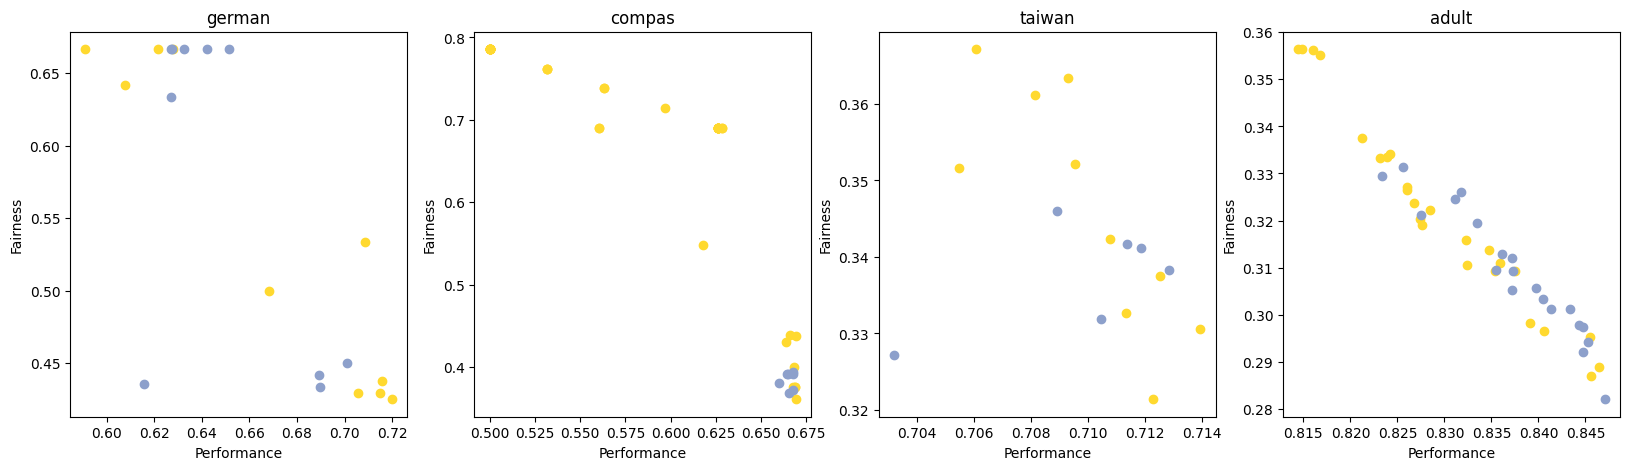

In [5]:
datasets = ["german", "compas", "taiwan", "adult"]
fig, axs = plt.subplots(1, len(datasets), figsize=(20, 5))
for d, dataset in enumerate(datasets):
    for model in ["LGBMClassifier", "M2FGB_grad"]:

        df = pd.read_csv(f"../results_aaai_v2/experiment_8_groups/{dataset}/{model}/trials.csv")
        df.columns = [c.replace("user_attrs_", "") for c in df.columns]

        # get non dominated points on val
        df["non_dominated"] = True

        for i, row in df.iterrows():
            for j, row2 in df.iterrows():
                if i == j:
                    continue
                if row["perf_val"] < row2["perf_val"] and row["fair_val"] < row2["fair_val"]:
                    df.at[i, "non_dominated"] = False
                    break
        df = df[df["non_dominated"]]
        axs[d].scatter(df.perf_test, df.fair_test, c = methods_color[model], label = methods_names[model])
        axs[d].set_xlabel("Performance")
        axs[d].set_ylabel("Fairness")
        axs[d].set_title(dataset)
plt.show()

In [27]:
import sys
sys.path.append("../scripts")
from moo_experiments import experiment1

In [28]:
experiment1()

  0%|          | 0/150 [00:00<?, ?it/s]

{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6, 'Female_4': 7}
{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6, 'Female_4': 7}
{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6, 'Female_4': 7}
{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6, 'Female_4': 7}
{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6, 'Female_4': 7}
{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6, 'Female_4': 7}
{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6, 'Female_4': 7}
{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6, 'Female_4': 7}
{'Male_4': 0, 'Female_1': 1, 'Male_3': 2, 'Male_2': 3, 'Male_1': 4, 'Female_2': 5, 'Female_3': 6

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

KeyboardInterrupt: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f